In [340]:
import polars as pl
import altair as alt
import os
# For rendering in online GitHub notebook
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

In [341]:
dtype = {
    'id': str,
    'fips': str,
    'total': int,
    'total_off_site': int,
    'male': int,
    'female': int,
    'other_gender': int,
    'white': int,
    'black': int,
    'hispanic': int,
    'asian': int,
    'american_indian': int,
    'mexican_american': int,
    'multi_racial': int,
    'other_race': int,
    'on_probation': int,
    'on_parole': int,
    'felony': int,
    'misdemeanor': int,
    'other_offense': int,
    'convicted_or_sentenced': int,
    'detained_or_awaiting_trial': int,
    'first_time_incarcerated': int,
    'employed': int,
    'unemployed': int,
    'citizen': int,
    'noncitizen': int,
    'juvenile': int,
    'juvenile_male': int,
    'juvenile_female': int,
    'death_row_condemned': int,
    'solitary_confinement': int,
    'technical_parole_violators': int,
    'civil_offense': int,
    'federal_offense': int
}

In [342]:
fips = pl.read_csv('fips.tab', sep = '\t', dtypes = dtype).with_columns([
    pl.col('fips').str.replace('\.0', ''),
    pl.col('cname').str.to_uppercase(),
]).unique()

incidents = pl.read_csv('incidents.csv', dtype = dtype)
jails     = pl.read_csv('jails.csv', dtype = dtype).with_column(
    pl.col('county').str.to_uppercase()
)

snapshots = pl.read_csv('snapshots.csv', dtype = dtype).with_columns([
    pl.col('snapshot_date').str.strptime(pl.Date, fmt='%Y-%m-%d').cast(pl.Datetime),
    pl.col('total').median().over('snapshot_date').alias('pop_median'),
])

In [343]:
fips.head(3)

shape: (3, 8)
┌─────────┬─────┬─────┬───────┬────────────────┬───────┬───────┬──────┐
│ sname   ┆ sab ┆ sid ┆ sfips ┆ cname          ┆ saint ┆ cfips ┆ fips │
│ ---     ┆ --- ┆ --- ┆ ---   ┆ ---            ┆ ---   ┆ ---   ┆ ---  │
│ str     ┆ str ┆ f64 ┆ i64   ┆ str            ┆ i64   ┆ i64   ┆ str  │
╞═════════╪═════╪═════╪═══════╪════════════════╪═══════╪═══════╪══════╡
│ Alabama ┆ AL  ┆ 1.0 ┆ 1     ┆ AUTAUGA COUNTY ┆ 0     ┆ 1     ┆ 1001 │
├╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┼╌╌╌╌╌╌┤
│ Alabama ┆ AL  ┆ 1.0 ┆ 1     ┆ AUTAUGA CTY.   ┆ 0     ┆ 1     ┆ 1001 │
├╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┼╌╌╌╌╌╌┤
│ Alabama ┆ AL  ┆ 1.0 ┆ 1     ┆ AUTAUGA CNTY.  ┆ 0     ┆ 1     ┆ 1001 │
└─────────┴─────┴─────┴───────┴────────────────┴───────┴───────┴──────┘

In [344]:
incidents.head(3)

shape: (3, 12)
┌──────┬──────────────┬─────────────┬────────┬─────┬──────────┬─────────┬─────────────┬────────────┐
│ id   ┆ start_date   ┆ end_date    ┆ deaths ┆ ... ┆ suicides ┆ escapes ┆ source_url  ┆ source_url │
│ ---  ┆ ---          ┆ ---         ┆ ---    ┆     ┆ ---      ┆ ---     ┆ ---         ┆ _2         │
│ str  ┆ str          ┆ str         ┆ i64    ┆     ┆ i64      ┆ str     ┆ str         ┆ ---        │
│      ┆              ┆             ┆        ┆     ┆          ┆         ┆             ┆ str        │
╞══════╪══════════════╪═════════════╪════════╪═════╪══════════╪═════════╪═════════════╪════════════╡
│ 6650 ┆ 2019-03-10   ┆ 2019-03-11  ┆ 1      ┆ ... ┆ 0        ┆ null    ┆ https://www ┆ https://gr │
│      ┆ 00:00:00     ┆ 00:00:00    ┆        ┆     ┆          ┆         ┆ .reuters.co ┆ aphics.tho │
│      ┆ +0000 UTC    ┆ +0000 UTC   ┆        ┆     ┆          ┆         ┆ m/investig. ┆ msonreuter │
│      ┆              ┆             ┆        ┆     ┆          ┆         ┆ ..          ┆ s....      │
├╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 6650 ┆ 2019-03-24   ┆ 2019-03-25  ┆ 1      ┆ ... ┆ 0        ┆ null    ┆ https://www ┆ https://gr │
│      ┆ 00:00:00     ┆ 00:00:00    ┆        ┆     ┆          ┆         ┆ .reuters.co ┆ aphics.tho │
│      ┆ +0000 UTC    ┆ +0000 UTC   ┆        ┆     ┆          ┆         ┆ m/investig. ┆ msonreuter │
│      ┆              ┆             ┆        ┆     ┆          ┆         ┆ ..          ┆ s....      │
├╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 6650 ┆ 2019-05-29   ┆ 2019-05-30  ┆ 1      ┆ ... ┆ 0        ┆ null    ┆ https://www ┆ https://gr │
│      ┆ 00:00:00     ┆ 00:00:00    ┆        ┆     ┆          ┆         ┆ .reuters.co ┆ aphics.tho │
│      ┆ +0000 UTC    ┆ +0000 UTC   ┆        ┆     ┆          ┆         ┆ m/investig. ┆ msonreuter │
│      ┆              ┆             ┆        ┆     ┆          ┆         ┆ ..          ┆ s....      │
└──────┴──────────────┴─────────────┴────────┴─────┴──────────┴─────────┴─────────────┴────────────┘

In [345]:
jails.head(3)

shape: (3, 15)
┌──────┬───────┬────────────┬────────────┬─────┬────────────┬────────────┬────────────┬────────────┐
│ id   ┆ count ┆ facility_n ┆ facility_a ┆ ... ┆ felonies_g ┆ hold_less_ ┆ facility_g ┆ num_inmate │
│ ---  ┆ y     ┆ ame        ┆ ddress     ┆     ┆ reater_tha ┆ than_72_ho ┆ ender      ┆ s_rated_fo │
│ str  ┆ ---   ┆ ---        ┆ ---        ┆     ┆ n_1_yr     ┆ urs        ┆ ---        ┆ r          │
│      ┆ str   ┆ str        ┆ str        ┆     ┆ ---        ┆ ---        ┆ i64        ┆ ---        │
│      ┆       ┆            ┆            ┆     ┆ i64        ┆ i64        ┆            ┆ i64        │
╞══════╪═══════╪════════════╪════════════╪═════╪════════════╪════════════╪════════════╪════════════╡
│ 7690 ┆ ALLEN ┆ Oakdale    ┆ 118 N 10th ┆ ... ┆ 0          ┆ 0          ┆ 3          ┆ 13         │
│      ┆ PARIS ┆ City Jail  ┆ Street     ┆     ┆            ┆            ┆            ┆            │
│      ┆ H     ┆            ┆            ┆     ┆            ┆            ┆            ┆            │
├╌╌╌╌╌╌┼╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 7691 ┆ BOSSI ┆ Bossier    ┆ 620 Benton ┆ ... ┆ 0          ┆ 0          ┆ 3          ┆ 70         │
│      ┆ ER    ┆ City Jail  ┆ Road       ┆     ┆            ┆            ┆            ┆            │
│      ┆ PARIS ┆            ┆            ┆     ┆            ┆            ┆            ┆            │
│      ┆ H     ┆            ┆            ┆     ┆            ┆            ┆            ┆            │
├╌╌╌╌╌╌┼╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 7692 ┆ BOSSI ┆ Shreveport ┆ 755 Hope   ┆ ... ┆ 0          ┆ 0          ┆ 3          ┆ 284        │
│      ┆ ER    ┆ City Jail  ┆ Street     ┆     ┆            ┆            ┆            ┆            │
│      ┆ PARIS ┆            ┆            ┆     ┆            ┆            ┆            ┆            │
│      ┆ H,    ┆            ┆            ┆     ┆            ┆            ┆            ┆            │
│      ┆ CADDO ┆            ┆            ┆     ┆            ┆            ┆            ┆            │
│      ┆ PARIS ┆            ┆            ┆     ┆            ┆            ┆            ┆            │
│      ┆ H     ┆            ┆            ┆     ┆            ┆            ┆            ┆            │
└──────┴───────┴────────────┴────────────┴─────┴────────────┴────────────┴────────────┴────────────┘

In [346]:
snapshots.head(3)

shape: (3, 38)
┌──────────┬────────────┬───────┬────────────┬─────┬────────────┬────────────┬────────────┬──────────┐
│ id       ┆ snapshot_d ┆ total ┆ total_off_ ┆ ... ┆ source_url ┆ civil_offe ┆ federal_of ┆ pop_medi │
│ ---      ┆ ate        ┆ ---   ┆ site       ┆     ┆ _2         ┆ nse        ┆ fense      ┆ an       │
│ str      ┆ ---        ┆ i64   ┆ ---        ┆     ┆ ---        ┆ ---        ┆ ---        ┆ ---      │
│          ┆ datetime[μ ┆       ┆ i64        ┆     ┆ str        ┆ i64        ┆ i64        ┆ f64      │
│          ┆ s]         ┆       ┆            ┆     ┆            ┆            ┆            ┆          │
╞══════════╪════════════╪═══════╪════════════╪═════╪════════════╪════════════╪════════════╪══════════╡
│ 042b1a2a ┆ 2000-08-01 ┆ 78    ┆ null       ┆ ... ┆ null       ┆ null       ┆ null       ┆ 46.0     │
│          ┆ 00:00:00   ┆       ┆            ┆     ┆            ┆            ┆            ┆          │
├╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┤
│ 042b1a2a ┆ 2000-09-01 ┆ 132   ┆ null       ┆ ... ┆ null       ┆ null       ┆ null       ┆ 50.0     │
│          ┆ 00:00:00   ┆       ┆            ┆     ┆            ┆            ┆            ┆          │
├╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┤
│ 042b1a2a ┆ 2000-10-01 ┆ 172   ┆ null       ┆ ... ┆ null       ┆ null       ┆ null       ┆ 48.0     │
│          ┆ 00:00:00   ┆       ┆            ┆     ┆            ┆            ┆            ┆          │
└──────────┴────────────┴───────┴────────────┴─────┴────────────┴────────────┴────────────┴──────────┘

### Join the dataframes together for county-level data

In [347]:
jails = jails.join(fips, left_on = ['county', 'facility_state'], right_on = ['cname', 'sab'])

In [348]:
snapshots = snapshots.join(jails, on = 'id').with_columns([
    pl.col('total').median().over('id').alias('pop_median'),
    pl.col('source_url').apply(lambda x: os.path.splitext(x)[1]).alias('ext')
])

### Get the "richness" df

In [349]:
cols = [c for c in df.columns if c not in ['id', 'snapshot_date', 'source_url', 'source_url_2']             ]                              
non_nulls = snapshots.apply(lambda tup: sum([1 for value in tup if value is not None]))

richness = snapshots.with_column(
    pl.Series('non_null_count', list(non_nulls)[0])
    ).groupby('id').agg([
        pl.col('non_null_count').median(),
        pl.col('fips').first(),
])

### The "deaths" df

In [350]:
deaths = incidents.join(jails, on = 'id').groupby(['fips']).agg([
    pl.col('deaths').sum().alias('total_deaths'),
    (pl.col('deaths').sum()/pl.col('num_inmates_rated_for').sum()).alias('deaths_per_bed'),
    pl.col('facility_name').list(),
    pl.col('num_inmates_rated_for').sum(),
])

In [351]:
deaths.head(3)

shape: (3, 5)
┌───────┬──────────────┬────────────────┬──────────────────────────────────┬───────────────────────┐
│ fips  ┆ total_deaths ┆ deaths_per_bed ┆ facility_name                    ┆ num_inmates_rated_for │
│ ---   ┆ ---          ┆ ---            ┆ ---                              ┆ ---                   │
│ str   ┆ i64          ┆ f64            ┆ list[str]                        ┆ i64                   │
╞═══════╪══════════════╪════════════════╪══════════════════════════════════╪═══════════════════════╡
│ 31019 ┆ 1            ┆ 0.004878       ┆ ["Buffalo County Jail"]          ┆ 205                   │
├╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 6019  ┆ 68           ┆ 0.000304       ┆ ["Fresno County Jail", "Fresno   ┆ 223788                │
│       ┆              ┆                ┆ C...                             ┆                       │
├╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 26049 ┆ 12           ┆ 0.001724       ┆ ["GeneseeCounty Jail",           ┆ 6960                  │
│       ┆              ┆                ┆ "GeneseeC...                     ┆                       │
└───────┴──────────────┴────────────────┴──────────────────────────────────┴───────────────────────┘

In [352]:
def county_map_country(source, title_string, subtitle_string, color_by,
                       legend_title, filename, colorscheme = 'orangered', 
                       colorscale = 'linear'):
    
    '''
    Create a color map of the country showing the relevant data.
    '''
    
    from vega_datasets import data
    counties = alt.topo_feature(data.us_10m.url, 'counties')
    states = alt.topo_feature(data.us_10m.url, 'states')
    
    county_outlines = alt.Chart(counties).mark_geoshape(
        fill = None,
        stroke = 'black',
        strokeWidth = .1
    )
    
    state_outlines = alt.Chart(states).mark_geoshape(
        fill = 'white',
        stroke = 'black',
        strokeWidth = 1
    )
    
    data_layer = alt.Chart(counties,
          title = alt.TitleParams(
              fontSize = 20,
              subtitleFontSize = 15,
              anchor = 'start',
              text = title_string,
              subtitle = subtitle_string,),
    ).mark_geoshape(
        stroke = 'black',
        strokeWidth = .4,
    ).encode(
        color = alt.Color(
            f'{color_by}:Q', 
            scale = alt.Scale(scheme = colorscheme, type = colorscale), 
            title = legend_title),
    ).transform_lookup(
        lookup = 'id',
        from_ = alt.LookupData(
            source, 
            'fips', 
            [color_by])
    ).project(
        type = 'albersUsa'
    ).properties(
        width = 1000,
        height = 600
    )
    
    
    chart = (state_outlines + county_outlines + data_layer)
        
    chart.save(filename)
    return chart

In [353]:
def county_map_state(source, title_string, subtitle_string, color_by, legend_title, state_code,
                     filename, width = 1000, height = 600, colorscheme = 'orangered', 
                     colorscale = 'linear'):
    
#   https://www2.census.gov/programs-surveys/decennial/2010/partners/pdf/FIPS_StateCounty_Code.pdf

    from vega_datasets import data
    counties = alt.topo_feature(data.us_10m.url, 'counties')
    states = alt.topo_feature(data.us_10m.url, 'states')
    
    county_outlines = alt.Chart(counties).mark_geoshape(
        fill = None,
        stroke = 'black',
        strokeWidth = .1
    ).transform_calculate(
        state_id = "(datum.id / 1000)|0"
    ).transform_filter(
        alt.datum.state_id == state_code
    )
    
    state_outlines = alt.Chart(states).mark_geoshape(
        fill = 'fff',
        stroke = 'black',
        strokeWidth = 1
    ).transform_filter(
        alt.datum.id == state_code
    )
    
    data_layer = alt.Chart(counties,
          title = alt.TitleParams(
              fontSize = 20,
              subtitleFontSize = 15,
              anchor = 'start',
              text = title_string,
              subtitle = subtitle_string,),
    ).mark_geoshape(
        stroke = 'black',
        strokeWidth = .4,
    ).encode(
        color = alt.Color(
            f'{color_by}:Q', 
            scale = alt.Scale(scheme = colorscheme, type = colorscale), 
            title = legend_title),
    ).project(
        type = 'albersUsa'
    ).properties(
        width = width,
        height = height,
    ).transform_calculate(
        state_id = "(datum.id / 1000)|0"
    ).transform_filter(
        alt.datum.state_id == state_code
    ).transform_lookup(
        lookup = 'id',
        from_ = alt.LookupData(
            source, 
            'fips', 
            [color_by])
    )

    chart = (state_outlines + county_outlines + data_layer)
    chart.save(filename)
    return chart

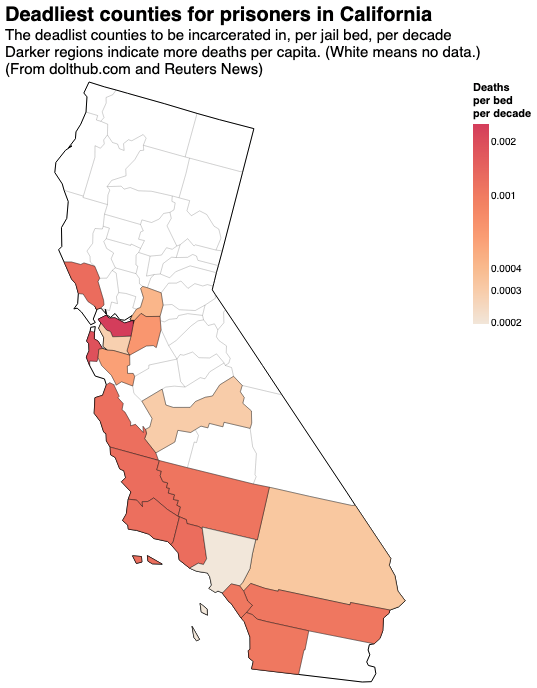

In [354]:
county_map_state(
    deaths.to_pandas(), 
    title_string = 'Deadliest counties for prisoners in California',
    subtitle_string = [
               "The deadlist counties to be incarcerated in, per jail bed, per decade",
               "Darker regions indicate more deaths per capita. (White means no data.)",
               "(From dolthub.com and Reuters News)"],
    color_by = 'deaths_per_bed',
    legend_title = ['Deaths', 'per bed', 'per decade'],
    state_code = 6,
    filename = 'sl-deadliest-cali.svg',
    width = 450,
    height = 600,
    colorscale = 'log',
    colorscheme = 'lightorange',)

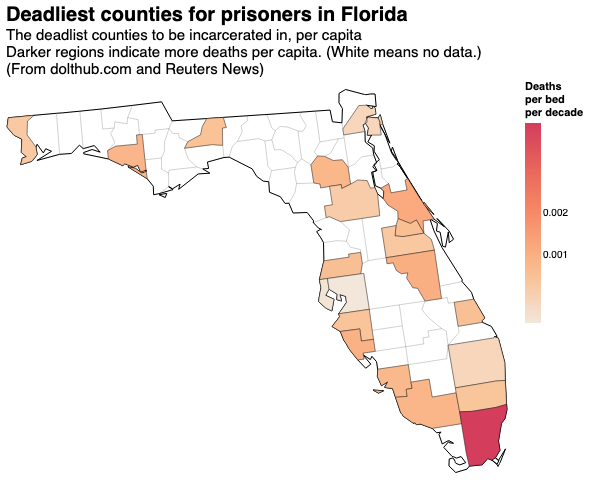

In [355]:
county_map_state(deaths.to_pandas(), 
                        title_string = 'Deadliest counties for prisoners in Florida',
                        subtitle_string = [
                            "The deadlist counties to be incarcerated in, per capita",
                            "Darker regions indicate more deaths per capita. (White means no data.)",
                            "(From dolthub.com and Reuters News)"],
                        color_by = 'deaths_per_bed',
                        legend_title = ['Deaths', 'per bed', 'per decade'],
                        state_code = 12,
                        filename = 'sl-deadliest-florida.svg',
                        width = 500,
                        height = 400,
                        colorscale = 'log',
                        colorscheme = 'lightorange',
          )

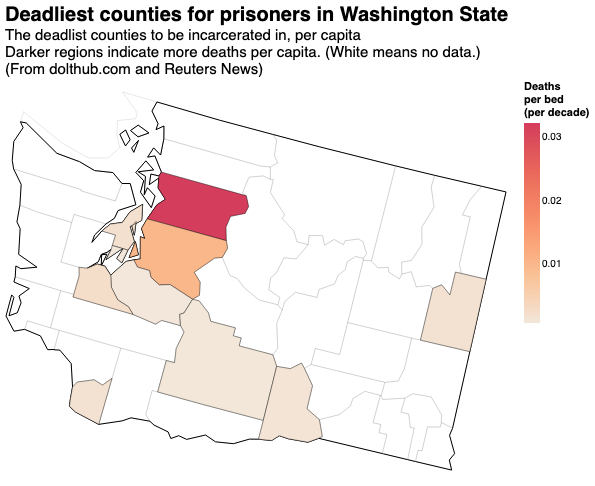

In [356]:
county_map_state(deaths.to_pandas(), 
                        title_string = 'Deadliest counties for prisoners in Washington State',
                        subtitle_string = [
                            "The deadlist counties to be incarcerated in, per capita",
                            "Darker regions indicate more deaths per capita. (White means no data.)",
                            "(From dolthub.com and Reuters News)"],
                        color_by = 'deaths_per_bed',
                        legend_title = ['Deaths', 'per bed', '(per decade)'],
                        state_code = 53,
                        filename = 'sl-deadliest-washington.svg',
                        width = 500,
                        height = 400,
                        colorscale = 'linear',
                        colorscheme = 'lightorange',
          )

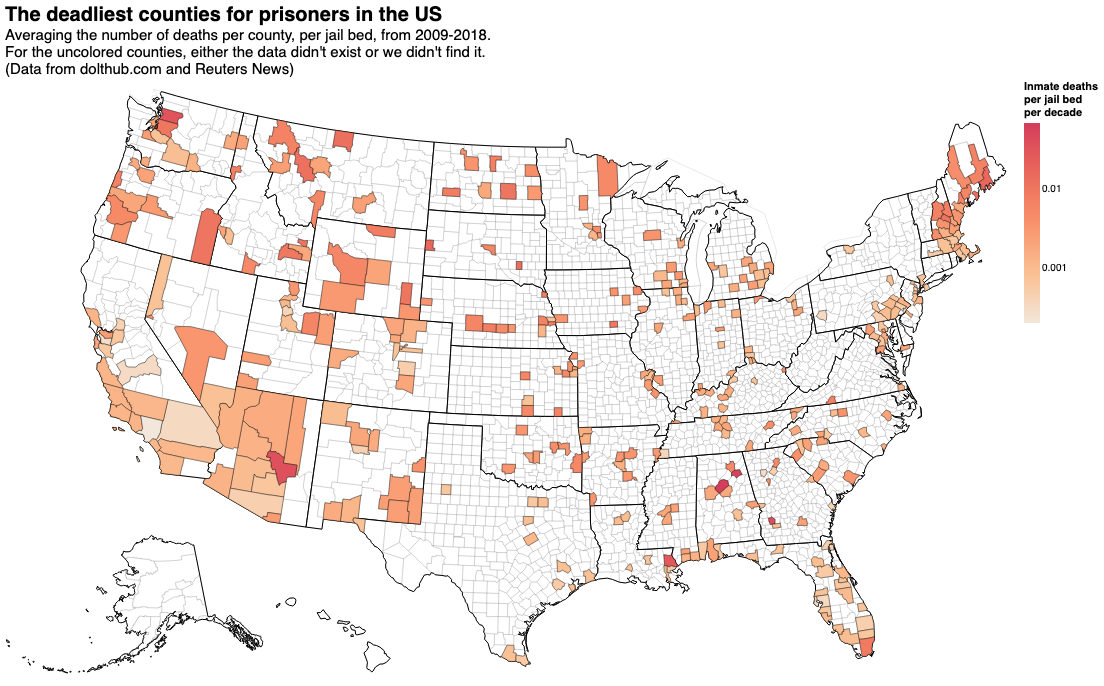

In [357]:
county_map_country(deaths.to_pandas(),
           title_string = 'The deadliest counties for prisoners in the US', 
           subtitle_string = [
               "Averaging the number of deaths per county, per jail bed, from 2009-2018.",
               "For the uncolored counties, either the data didn't exist or we didn't find it.",
               "(Data from dolthub.com and Reuters News)"],
           color_by = 'deaths_per_bed',
           legend_title = ['Inmate deaths', 'per jail bed', 'per decade'],
           filename = 'sl-deadliest-counties.svg',
           colorscheme = 'lightorange',
           colorscale = 'log',
          )

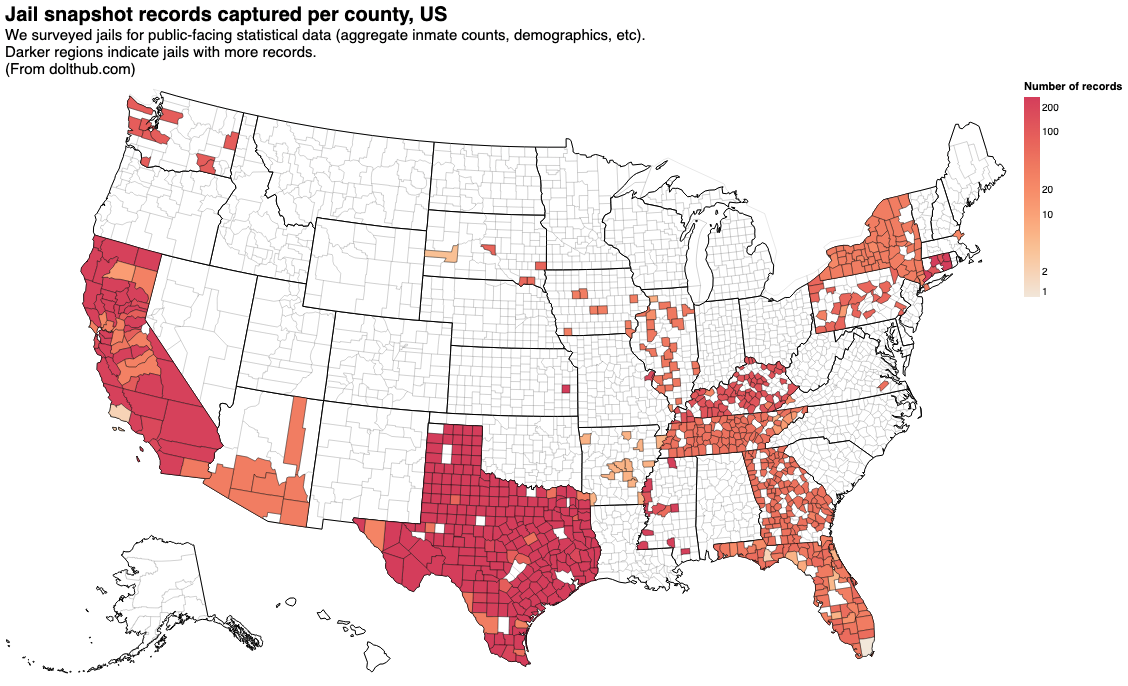

In [358]:
county_map_country(snapshots.groupby(['id', 'fips']).count().to_pandas(), 
           title_string = 'Jail snapshot records captured per county, US',
           subtitle_string = [
                "We surveyed jails for public-facing statistical data (aggregate inmate counts, demographics, etc).",
                "Darker regions indicate jails with more records.",
                "(From dolthub.com)"
           ],
           color_by = 'count',
           legend_title = 'Number of records',
           colorscheme = 'lightorange',
           colorscale = 'log',
           filename = 'sl-snapshot-counties.svg',
          )

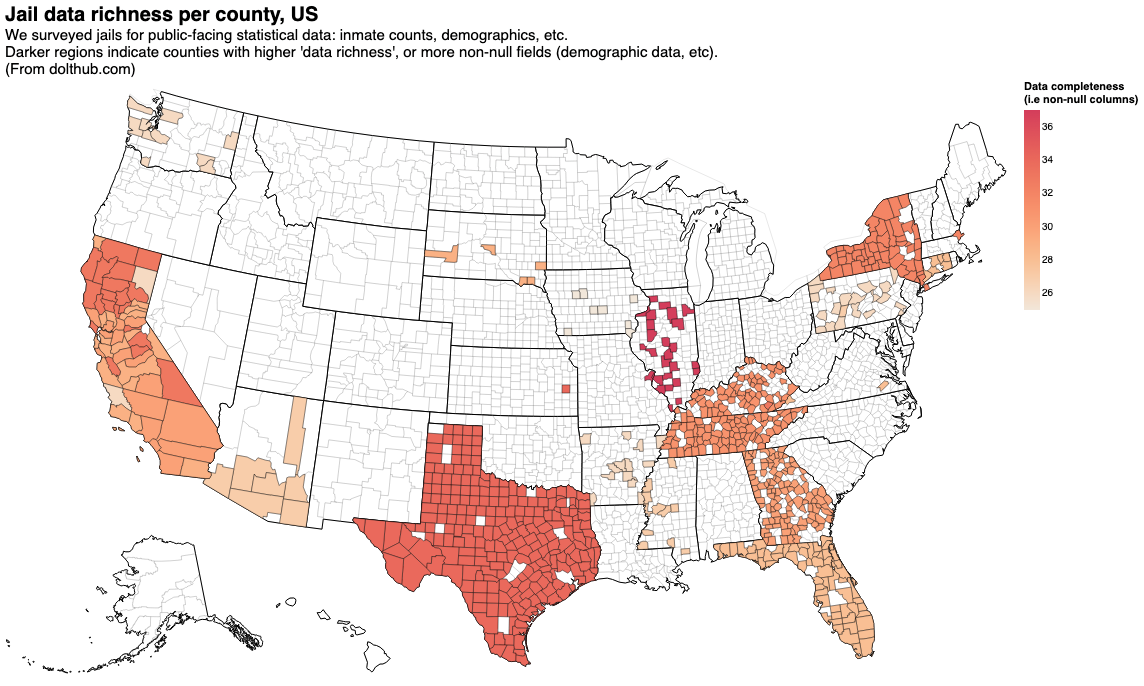

In [359]:
county_map_country(richness.to_pandas(), 
           title_string = 'Jail data richness per county, US',
           subtitle_string = [
                "We surveyed jails for public-facing statistical data: inmate counts, demographics, etc.",
                "Darker regions indicate counties with higher 'data richness', or more non-null fields (demographic data, etc).",
                "(From dolthub.com)"
           ],
           color_by = 'non_null_count',
           legend_title = ['Data completeness', '(i.e non-null columns)'],
           colorscheme = 'lightorange',
           filename = 'sl-richness-counties.svg',
          )

In [360]:
print(snapshots['ext'].value_counts())

shape: (6, 2)
┌───────┬────────┐
│ ext   ┆ counts │
│ ---   ┆ ---    │
│ str   ┆ u32    │
╞═══════╪════════╡
│ .pdf  ┆ 90788  │
├╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌┤
│ .asp  ┆ 29633  │
├╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌┤
│       ┆ 9080   │
├╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌┤
│ .html ┆ 3105   │
├╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌┤
│ .aspx ┆ 1082   │
├╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌┤
│ .cfm  ┆ 728    │
└───────┴────────┘


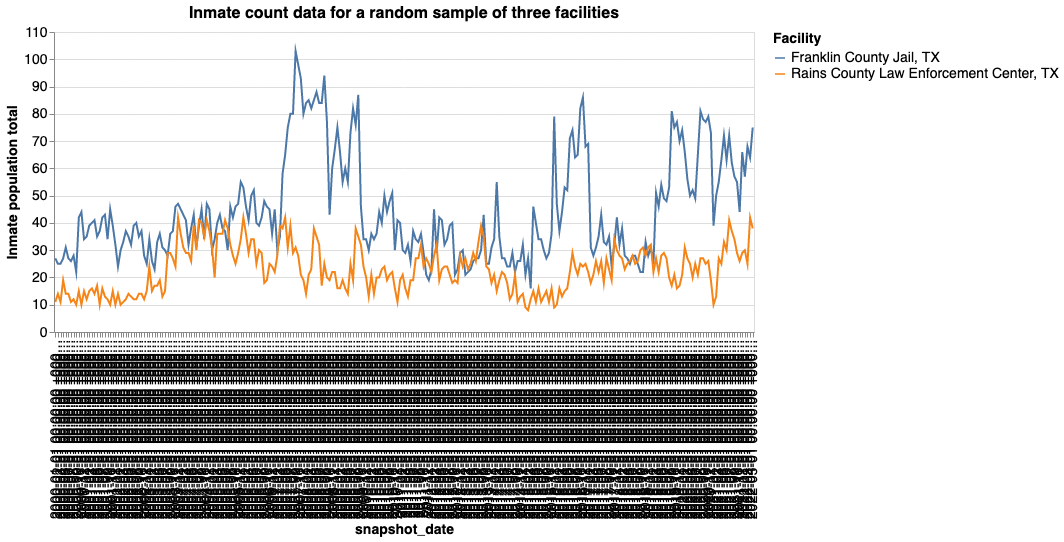

In [361]:
jail_ids = df.groupby('id').count().sort('count').tail(500).sample(3)['id'].to_list()

source = df.filter(
    pl.col('id').is_in(jail_ids)
).join(jails, on = 'id').with_columns([
    pl.col('county').str.to_uppercase(),
    pl.concat_str(['facility_name', pl.lit(', '), 'facility_state']).alias('Facility'),
    pl.col('total').median().over('id').alias('median')
    # pl.col('total').alias('Total inmates')
]).filter(pl.col('total') < 5*pl.col('median')).filter(pl.col('total') > .2*pl.col('median')).to_pandas()

lines = (
    alt.Chart(source,
              title = 'Inmate count data for a random sample of three facilities'
             )
    .mark_line()
    .encode(
        x="snapshot_date", 
        y=alt.Y("total", title = 'Inmate population total'), 
        color="Facility")
).properties(
    width=700,
    height=300
).configure_legend(
    labelLimit = 1000,
    titleFontSize=14,
    labelFontSize=14,
).configure_axis(
    labelFontSize = 14,
    titleFontSize = 14,
).configure_title(
    fontSize = 16,
)

lines.save('sl-inmate-random.svg')
lines